In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/AI Coursework/synthetic_health_data.csv")

# Preview the dataset
print("Dataset Preview:")
print(df.head())

# Display dataset information
print("\nDataset Information:")
print(df.info())

# Display basic statistics of the dataset
print("\nDataset Statistics:")
print(df.describe())

Dataset Preview:
         Age        BMI  Exercise_Frequency  Diet_Quality  Sleep_Hours  \
0  45.960570  31.996777                   5     55.403270     7.300359   
1  38.340828  29.623168                   6     41.838357     7.012419   
2  47.772262  25.298152                   5     76.904948     6.028641   
3  58.276358  21.765316                   2     49.756767     5.802714   
4  37.190160  28.491117                   2     44.218737     7.912548   

   Smoking_Status  Alcohol_Consumption  Health_Score  
0               0             2.834707     70.542122  
1               1             7.199517     57.244637  
2               1             4.097944     96.333722  
3               1             3.649377     61.321783  
4               0             2.839795     67.175894  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               -----

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Age                    0
BMI                    0
Exercise_Frequency     0
Diet_Quality           0
Sleep_Hours            0
Smoking_Status         0
Alcohol_Consumption    0
Health_Score           0
dtype: int64


In [ ]:
# Remove duplicates if any
df.drop_duplicates(inplace=True)

# Standardize column names (optional but helpful for consistency)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

print("\nData after basic cleaning:")
print(df.head())


Data after basic cleaning:
         age        bmi  exercise_frequency  diet_quality  sleep_hours  \
0  45.960570  31.996777                   5     55.403270     7.300359   
1  38.340828  29.623168                   6     41.838357     7.012419   
2  47.772262  25.298152                   5     76.904948     6.028641   
3  58.276358  21.765316                   2     49.756767     5.802714   
4  37.190160  28.491117                   2     44.218737     7.912548   

   smoking_status  alcohol_consumption  health_score  
0               0             2.834707     70.542122  
1               1             7.199517     57.244637  
2               1             4.097944     96.333722  
3               1             3.649377     61.321783  
4               0             2.839795     67.175894  


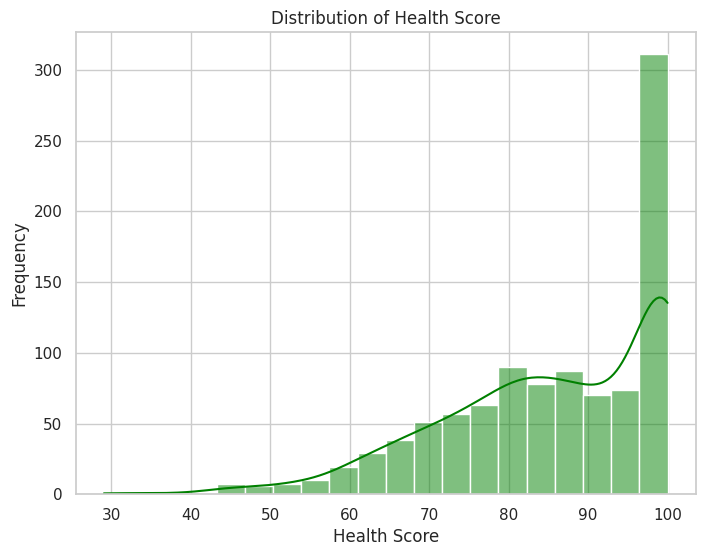

In [ ]:
# Distribution of the Dependent Variable
sns.set(style="whitegrid")

# Visualization 1: Distribution of the Dependent Variable
plt.figure(figsize=(8, 6))
# Access the column using the standardized name 'alcohol_consumption'
sns.histplot(df['health_score'], kde=True, bins=20, color='green')
plt.title('Distribution of Health Score')
plt.xlabel('Health Score')
plt.ylabel('Frequency')
plt.show()

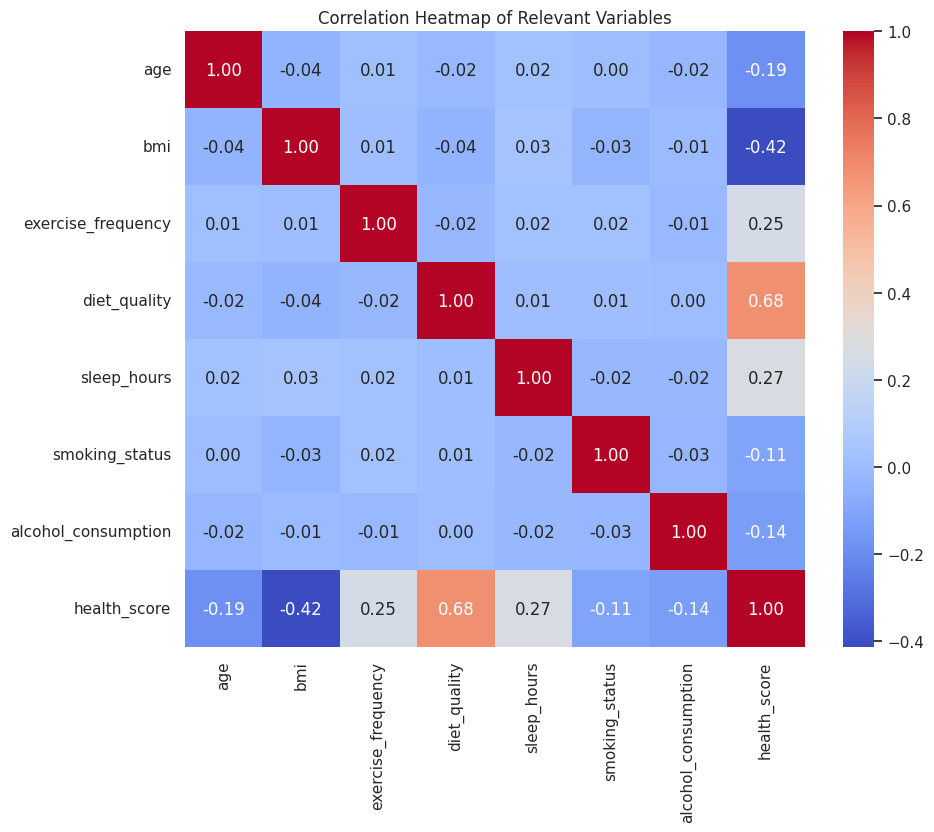

In [ ]:
#Correlation of Heatmap of Relevant Variables
relevant_columns = ['age', 'bmi','exercise_frequency', 'diet_quality','sleep_hours','smoking_status', 'alcohol_consumption','health_score']
plt.figure(figsize=(10, 8))
sns.heatmap(df[relevant_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Relevant Variables')
plt.show()

In [ ]:
# Extracting Relevant Data
X = df[['age', 'bmi', 'alcohol_consumption', 'sleep_hours', 'exercise_frequency', 'smoking_status','diet_quality']].values
y = df['health_score'].values

# Normalize features for better optimization performance
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X = (X - X_mean) / X_std

# Add a bias term
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Spliting the data into train and test sets (80% train, 20% test)
split_idx = int(0.8 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# LINEAR REGRESSION
# Initialize weights
weights = np.zeros(X_train.shape[1])

# Hyperparameters
learning_rate = 0.01
epochs = 1000

#Gradient Descent
for epoch in range(epochs):
  predictions = X_train.dot(weights)
  errors = predictions - y_train
  gradient = (1 / len(y_train)) * X_train.T.dot(errors)
  weights -= learning_rate * gradient

# Predicting function
def predict(X, weights):
  return X.dot(weights)

# Evaluating on the train and test sets
y_train_pred = predict(X_train, weights)
y_test_pred = predict(X_test, weights)

# Metrics
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def mean_squared_error(y_true, y_pred):
  return np.mean((y_true - y_pred) ** 2)

def r_squared(y_true, y_pred):
  ss_tot = np.sum((y_true - np.mean(y_true))** 2)
  ss_residual = np.sum((y_true - y_pred) ** 2)
  return 1 - (ss_residual / ss_tot)

# Calculating Metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r_squared(y_train, y_train_pred)
test_r2 = r_squared(y_test, y_test_pred)

# Printing Results
print("MAE(Mean Absolute Error)in Training Data:", train_mae)
print("MAE(Mean Absolute Error)in Testing Data:", test_mae)
print("MSE(Mean Squared Error) in Training Data:", train_mse)
print("MSE(Mean Squared Error) in Testing Data:", test_mse)
print("R-Squared(R2) in Training Data:", train_r2)
print("R-Squared(R2) in Testing Data:", test_r2)

MAE(Mean Absolute Error)in Training Data: 4.3528746356078525
MAE(Mean Absolute Error)in Testing Data: 4.476762976928109
MSE(Mean Squared Error) in Training Data: 30.5100869849826
MSE(Mean Squared Error) in Testing Data: 32.65619608129896
R-Squared(R2) in Training Data: 0.8319912652426572
R-Squared(R2) in Testing Data: 0.8370447843419562


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# MODEL 1: RANDOM FOREST REGRESSOR
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
y_test_pred_rf = random_forest_model.predict(X_test)

print("Random Forest Regressor Model trained.")

Random Forest Regressor Model trained.


In [ ]:
from sklearn.linear_model import LinearRegression

# MODEL 2: LINEAR REGRESSION
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_test_pred_lr = linear_model.predict(X_test)

print("Linear Regression Model Trained.")

Linear Regression Model Trained.


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluation Metrics
def evaluate_model(y_true, y_pred):
  mae = mean_absolute_error(y_true, y_pred)
  rmse = np.sqrt(mean_squared_error(y_true, y_pred))
  r2 = r2_score(y_true, y_pred)
  return mae, rmse, r2

# Evaluate Model 1: Random Forest Regressor
mae_rf, rmse_rf, r2_rf = evaluate_model(y_test, y_test_pred_rf)

# Evaluate Model 2: Linear Regression
mae_lr, rmse_lr, r2_lr = evaluate_model(y_test, y_test_pred_lr)

# Printing Results
print("Model 1: Random Forest Regressor:")
print(f"MAE: {mae_rf:.4f}, RMSE: {rmse_rf:.4f}, R2: {r2_rf:.4f}")

print("\nModel 2: Linear Regression:")
print(f"MAE: {mae_lr:.4f}, RMSE: {rmse_lr:.4f}, R2: {r2_lr:.4f}")

# Comparing & Identifying the Better Model
if r2_rf > r2_lr:
  print("\nConclusion: Random Forest Regressor Model performed better on R-Squared Value.")
else:
  print("\nConclusion: Linear Regression Model performed better on R-Squared Value.")

Model 1: Random Forest Regressor:
MAE: 5.1546, RMSE: 6.7937, R2: 0.7697

Model 2: Linear Regression:
MAE: 4.4763, RMSE: 5.7147, R2: 0.8370

Conclusion: Linear Regression Model performed better on R-Squared Value.


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameters
param_rf = {
    'n_estimators': [50,70, 100, 120],
    'max_depth': [20,50,100],  # Added multiple values
    'min_samples_split': [2, 5, 10,12],
    'min_samples_leaf': [1, 2, 4,6]
}
# RandomizedSearchCV for Random Forest
model_rf = RandomForestRegressor(random_state = 42)
random_search_rf = RandomizedSearchCV(estimator = model_rf, param_distributions = param_rf, n_iter = 10, cv = 5, random_state = 42)
random_search_rf.fit(X_train, y_train)

# Best Hyperparameters for Random Forest
best_params_rf = random_search_rf.best_params_
print("Best Hyperparameters for Random Forest:", best_params_rf)

Best Hyperparameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20}


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Hyperparameters
param_ridge = {'alpha': np.logspace(-3, 3, 10)}

#Use Ridge Regression as it allows Regularization
model_ridge = Ridge()

# Perform GridSearchCV
grid_search_linear = GridSearchCV(estimator = model_ridge, param_grid = param_ridge, cv = 5, scoring= 'r2')
grid_search_linear.fit(X_train, y_train)

# Best Hyperparameter for Linear Regression
best_params_linear = grid_search_linear.best_params_
print("Best Hyperparameters for Linear Regression (Ridge):")
print(best_params_linear)

Best Hyperparameters for Linear Regression (Ridge):
{'alpha': 2.154434690031882}


In [ ]:
# Summarizing the best hyperparameters for both models
print("Hyperparameter Optimization Results:")
print(f"Model 1 (Random Forest Regressor): Best Parameters: {best_params_rf}")
print(f"Model 2 (Ridge Regression): Best Parameters: {best_params_linear}")

Hyperparameter Optimization Results:
Model 1 (Random Forest Regressor): Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20}
Model 2 (Ridge Regression): Best Parameters: {'alpha': 2.154434690031882}


In [ ]:
feature_names = ['age', 'bmi', 'sleep_hours', 'exercise_frequency', 'smoking_status','alcohol_consumption','diet_quality']

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Model: Random Forest Regressor with optimal hyperparameters
model_rf = RandomForestRegressor(
    n_estimators=best_params_rf['n_estimators'],
    max_depth=best_params_rf['max_depth'],
    # min_samples_split=best_params_rf['min_samples_split'],
    # min_samples_leaf=best_params_rf['min_samples_leaf'],
    random_state=42
)

# Perform Recursive Feature Elimination (RFE)
num_features_to_select = X_train.shape[1] // 2  # Adjust the number of selected features as needed
rfe = RFE(estimator=model_rf, n_features_to_select=num_features_to_select)
rfe.fit(X_train, y_train)

# Identify Selected Features
selected_feature_names_rf = [feature for feature, selected in zip(feature_names, rfe.support_) if selected]

print("Best Features Selected for Random Forest Regressor:", selected_feature_names_rf)


Best Features Selected for Random Forest Regressor: ['bmi', 'sleep_hours', 'smoking_status']


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge

# Model: Ridge Regression with optimal hyperparameters
model_ridge = Ridge(alpha=best_params_linear['alpha'])

# Fitting the model
linear_rfe = RFE(estimator=model_ridge, n_features_to_select=6)
linear_rfe.fit(X_train, y_train)

# Identifying selected features
selected_features_linear = linear_rfe.get_support()
selected_feature_names_linear = [feature for feature, selected in zip(feature_names, selected_features_linear) if selected]

# Printing the result
print("Best Features For Ridge Regression:", selected_feature_names_linear)

Best Features For Ridge Regression: ['bmi', 'sleep_hours', 'smoking_status', 'alcohol_consumption', 'diet_quality']


In [ ]:
from sklearn.linear_model import Ridge

# Convert the selected features names to indices
selected__feature_indices_linear = [feature_names.index(feature) for feature in selected_feature_names_linear]

# Use the indices to select features from X_train & X_test
X_train_selected_linear = X_train[:, selected__feature_indices_linear]
X_test_selected_linear = X_test[:, selected__feature_indices_linear]

# Initialize the Ridge Regression model with the best hyperparameters
final_linear_model = Ridge(alpha = best_params_linear['alpha'])

# Train the final model
final_linear_model.fit(X_train_selected_linear, y_train)

# Predict on the test set
y_test_pred_final = final_linear_model.predict(X_test_selected_linear)

# Evaluate the final model's performance
mae_final = mean_absolute_error(y_test, y_test_pred_final)
rmse_final = np.sqrt(mean_squared_error(y_test, y_test_pred_final))
r2_final = r2_score(y_test, y_test_pred_final)

# Print the results
print("Final Model Performance with Selected Features:")
print(f"MAE: {mae_final:.4f}, RMSE: {rmse_final:.4f}, R2: {r2_final:.4f}")

# Compare with the original Linear Regression Model
print("\nComparison with Original Linear Regression Model:")
print(f"Original MAE: {mae_lr:.4f}, Original RMSE: {rmse_lr:.4f}, Original R2: {r2_lr:.4f}")
print(f"Final Model MAE: {mae_final:.2f}, Final Model RMSE: {rmse_final:.2f}, Final Model R2: {r2_final:.2f}")

if r2_final > r2_lr:
  print("\nConclusion: The final model performed better with selected features and optimized hyperparameters.")
else:
  print("\nConclusion: The final model did not perform better than the original Linear Regression Model.")



Final Model Performance with Selected Features:
MAE: 8.7519, RMSE: 11.1816, R2: 0.3761

Comparison with Original Linear Regression Model:
Original MAE: 4.4763, Original RMSE: 5.7147, Original R2: 0.8370
Final Model MAE: 8.75, Final Model RMSE: 11.18, Final Model R2: 0.38

Conclusion: The final model did not perform better than the original Linear Regression Model.


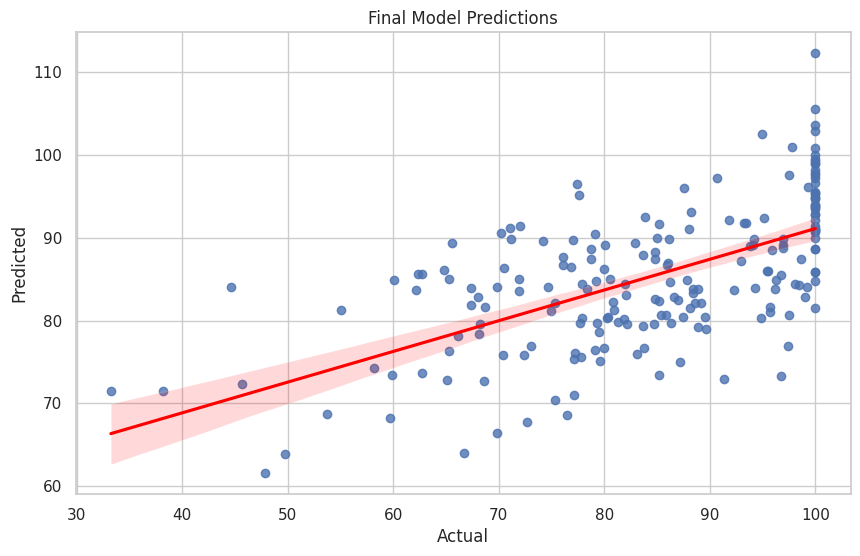

In [ ]:
# Final visualization
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_final})

plt.figure(figsize=(10,6))
sns.regplot(x='Actual', y='Predicted', data=results, line_kws={'color':'red'})
plt.title("Final Model Predictions")
plt.show()

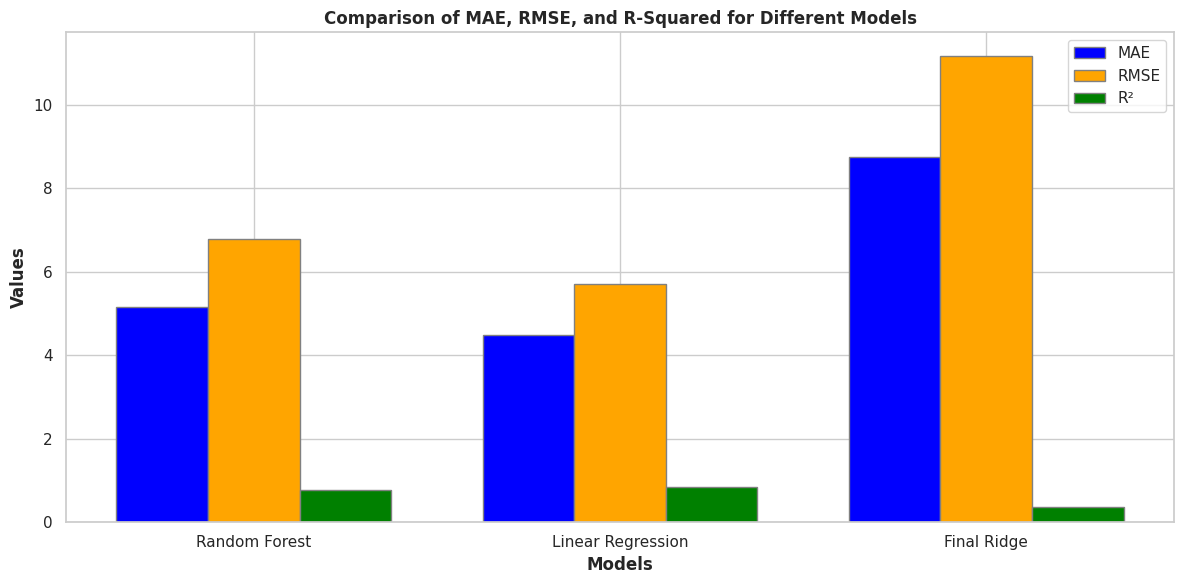

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the model names
models = ['Random Forest', 'Linear Regression', 'Final Ridge']

# Define the MAE, RMSE, and R² values for each model
mae_values = [mae_rf, mae_lr, mae_final]  # Replace with actual values from your context
rmse_values = [rmse_rf, rmse_lr, rmse_final]  # Replace with actual RMSE values
r2_values = [r2_rf, r2_lr, r2_final]      # Replace with actual values from your context

# Set the bar width
bar_width = 0.25

# Set the positions of the bars on the x-axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the bar graph
plt.figure(figsize=(12, 6))
plt.bar(r1, mae_values, color='blue', width=bar_width, edgecolor='grey', label='MAE')
plt.bar(r2, rmse_values, color='orange', width=bar_width, edgecolor='grey', label='RMSE')
plt.bar(r3, r2_values, color='green', width=bar_width, edgecolor='grey', label='R²')

# Adding labels and title
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(models))], models)
plt.ylabel('Values', fontweight='bold')
plt.title('Comparison of MAE, RMSE, and R-Squared for Different Models', fontweight='bold')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()